In [1]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import datetime
import wbdata
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook" # use "pio.renderers" to see the default renderer

In [3]:
wbdata.get_indicators(source=1)

id                                                 name
-------------------------------------------------  ---------------------------------------------------------------------------------------------------------------
ENF.CONT.COEN.ATDR                                 Enforcing contracts: Alternative dispute resolution (0-3) (DB16-20 methodology)
ENF.CONT.COEN.ATFE.PR                              Enforcing contracts: Attorney fees (% of claim)
ENF.CONT.COEN.COST.ZS                              Enforcing contracts: Cost (% of claim)
ENF.CONT.COEN.COST.ZS.DFRN                         Enforcing contracts: Cost (% of claim) - Score
ENF.CONT.COEN.CSMG                                 Enforcing contracts: Case management (0-6) (DB16-20 methodology)
ENF.CONT.COEN.CTAU                                 Enforcing contracts: Court automation (0-4) (DB17-20 methodology)
ENF.CONT.COEN.CTFE.PR                              Enforcing contracts: Court fees (% of claim)
ENF.CONT.COEN.CTSP.DB1719         

In [40]:
countries = ['LBN']

In [41]:
indicators = {"DT.DOD.DLXF.CD": "External_Debts","DT.DOD.DIMF.CD":"IMF_Credit","DT.DOD.DSTC.CD":"Short_term_debt","BM.GSR.TOTL.CD": "Income","FI.RES.TOTL.CD":"Total_Reserves","NY.GNP.MKTP.CD":"Gross_income","BX.GSR.TOTL.CD":"Exports"}

In [42]:
df = wbdata.get_dataframe(indicators, country=countries, parse_dates=True, keep_levels =True)

In [43]:
df

External_Debts    IMF_Credit  Short_term_debt  \
country date                                                        
Lebanon 2023-01-01             NaN           NaN              NaN   
        2022-01-01    5.052911e+10  1.065298e+09     1.551480e+10   
        2021-01-01    5.292312e+10  1.120330e+09     1.285684e+10   
        2020-01-01    5.844193e+10  2.783852e+08     1.015401e+10   
        2019-01-01    6.866264e+10  2.672822e+08     4.963206e+09   
...                            ...           ...              ...   
        1964-01-01             NaN           NaN              NaN   
        1963-01-01             NaN           NaN              NaN   
        1962-01-01             NaN           NaN              NaN   
        1961-01-01             NaN           NaN              NaN   
        1960-01-01             NaN           NaN              NaN   

                          Income  Total_Reserves  Gross_income       Exports  
country date                                                                  
Lebanon 2023-01-01           NaN             NaN           NaN           NaN  
        2022-01-01  2.575090e+10    3.251288e+10           NaN  1.359340e+10  
        2021-01-01  1.898225e+10    3.523922e+10  2.162578e+10  1.024088e+10  
        2020-01-01  1.782762e+10    4.244040e+10  3.069748e+10  1.038055e+10  
        2019-01-01  3.549142e+10    5.221348e+10  5.035876e+10  2.130364e+10  
...                          ...             ...           ...           ...  
        1964-01-01           NaN    2.330281e+08           NaN           NaN  
        1963-01-01           NaN    2.065125e+08           NaN           NaN  
        1962-01-01           NaN    2.065634e+08           NaN           NaN  
        1961-01-01           NaN    1.615509e+08           NaN           NaN  
        1960-01-01           NaN    1.401936e+08           NaN           NaN  

[64 rows x 7 columns]

In [44]:
df = pd.DataFrame(df.to_records())

def formatNum(x):
    """Creating a function that will change units to billions and round to 0 decimal places"""
    y = x/1000000000
    z = round(y)
    return(z)

df = df.replace(np.nan, 0)
df['Income'] = df['Income'].apply(formatNum)
df['External_Debts'] = df['External_Debts'].apply(formatNum)
df['Total_Reserves'] = df['Total_Reserves'].apply(formatNum)
df['IMF_Credit'] = df['IMF_Credit'].apply(formatNum)
df['Short_term_debt'] = df['Short_term_debt'].apply(formatNum)
df['Gross_income'] = df['Gross_income'].apply(formatNum)
df['Exports'] = df['Exports'].apply(formatNum)

In [45]:
df

,country,date,External_Debts,IMF_Credit,Short_term_debt,Income,Total_Reserves,Gross_income,Exports
0,Lebanon,2023-01-01,0,0,0,0,0,0,0
1,Lebanon,2022-01-01,51,1,16,26,33,0,14
2,Lebanon,2021-01-01,53,1,13,19,35,22,10
3,Lebanon,2020-01-01,58,0,10,18,42,31,10
4,Lebanon,2019-01-01,69,0,5,35,52,50,21
...,...,...,...,...,...,...,...,...,...
59,Lebanon,1964-01-01,0,0,0,0,0,0,0
60,Lebanon,1963-01-01,0,0,0,0,0,0,0
61,Lebanon,1962-01-01,0,0,0,0,0,0,0
62,Lebanon,1961-01-01,0,0,0,0,0,0,0


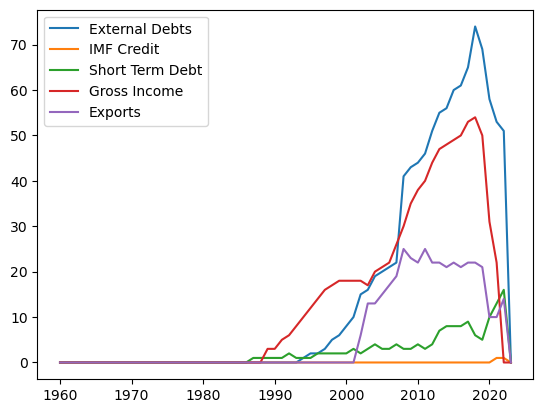

In [46]:
plt.figure()
plt.plot(df['date'],df['External_Debts'],label='External Debts')
plt.plot(df['date'],df['IMF_Credit'],label='IMF Credit')
plt.plot(df['date'],df['Short_term_debt'],label='Short Term Debt')
plt.plot(df['date'],df['Gross_income'],label='Gross Income')
plt.plot(df['date'],df['Exports'],label='Exports')
plt.legend()
plt.show()